# General analysis of a simulation

In [1]:
using HDF5
using PyPlot

In [2]:
thermostat = "Logistic"
filename = "test2.hdf5" #The file must exist in the HDF5 folder
file = h5open("../data/$(thermostat)/HDF5/$filename", "r");

In [3]:
sim = read(file);

In [4]:
t = sim["t"]
E = sim["E"]
K = sim["K"]
U = sim["U"];
T = sim["T"]
i = sim["invariant"]
peta = sim["peta"]
etas = sim["eta"]
vrandatom = sim["vrandatom"];

In [5]:
N = read(attrs(file)["N"])  
Q = read(attrs(file)["Q"])   ##Parameter associated to the thermostat

2.0

## Equilibrium

The approach to follows is to plot the temperature and establish the time when the equilibrium is reached, in order to discard the initial data

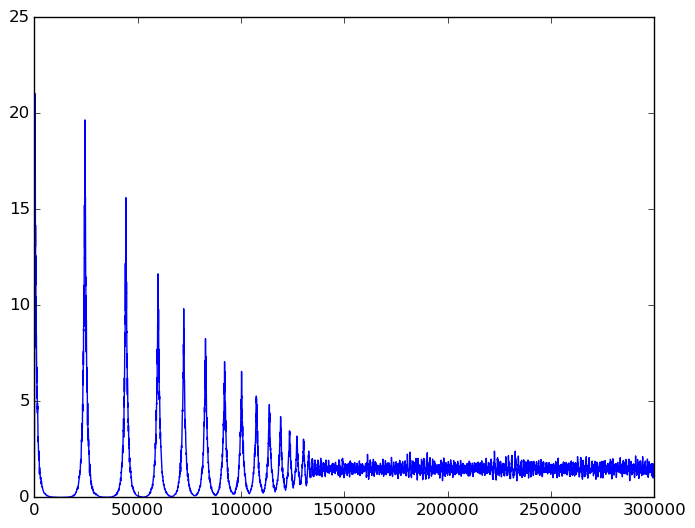

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0c0e601390>

In [6]:
plot(T)

In [9]:
stepeq = 150000;  ##Step where the equilibrium seems to be a fact

150000

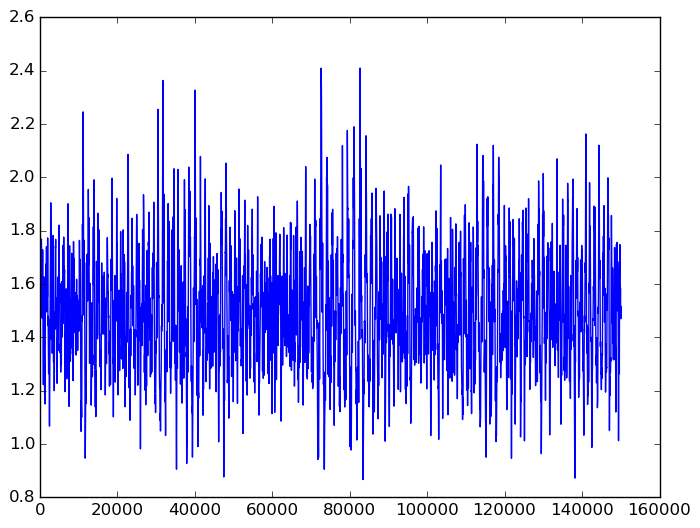

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0c0dfaa3d0>

In [10]:
plot(T[stepeq:end])

## Units

For going from reduced units (with `*`) to physical units one uses the following rules (taken from **Frenkel's book**)

+ $U = U^* \epsilon$ 
+ $\rho = \dfrac{\rho^* m}{\sigma^3}$ (in $kg/m^3$)
+ $\rho = \dfrac{\rho^* m}{\sigma^3 1000 \rm{AW}}$ (in $mol/L$)
+ $T = T^* \dfrac{\epsilon}{k_B}$
+ $C_v = C_v^*\dfrac{k_B AW}{m}$

Where AW stands for atomic weight.

In particular for Ar, the following data are used

| Quantity | Typical value |
| ---------|:-------------- |
| $\dfrac{\epsilon}{k_B}$ | $119.8  K$ |
| $\sigma$ | $3.405 x 10^{-10}  m$ |
| $m$ | $6.69 x 10^{-26}$  kg |
| $AW$ | $0.03994$ kg/mol |

With that, we convert the data used in the simulation as follows:


In [11]:
σ = 3.405e-10 
m = 6.69e-26
kb = 1.38064852e-23
ratio = 119.8
ϵ = kb*ratio
AW = 0.039948
Text = read(attrs(file)["T"])  
ρ = read(attrs(file)["rho"]); 
rhophysical = ρ*m/(σ^3*1000*AW)
Tphysical = Text*ratio
println("Tphysical = $(Tphysical), rhophysical = $(rhophysical)")

Tphysical = 179.7, rhophysical = 33.936708244735506


So, the physical values of the simulation for the temperature and density corresponds to $179.7$ K and $33.943$ mol/L. We then look for the physical properties at the [NIST webpage](http://webbook.nist.gov/cgi/fluid.cgi?Action=Load&ID=C7440371&Type=IsoTherm&Digits=5&PLow=&PHigh=&PInc=&T=179.25&RefState=DEF&TUnit=K&PUnit=MPa&DUnit=mol%2Fl&HUnit=kJ%2Fmol&WUnit=m%2Fs&VisUnit=uPa*s&STUnit=N%2Fm). In particular, for the heat capacity $C_v$. In this case its value is $19.214$ J/molK. We proceed to convert it to reduced units.


In [12]:
Cv_reduced = 19.214*m/(kb*AW)
println("Cv_reduced = $Cv_reduced")

Cv_reduced = 2.3305892088338864


This is the value that we will compare with the fluctuations in energy

## Fluctuations

General formula for fluctuations in energy in the canonical ensemble 

$$ C_vNk_B T^2 = \langle (H - \langle H \rangle)^2 \rangle  $$

In our case, we use the mean value of T  (from **Valenzuela's paper**)

$$ C_v = \dfrac{\langle (H - \langle H \rangle)^2 \rangle}{N k_B \langle T \rangle ^2} $$

And the reduced heat capacity is

$$ C_v^* = \dfrac{\langle (H - \langle H \rangle)^2 \rangle}{N \langle T \rangle ^2} $$

In [13]:
e = E[stepeq:end]; temp = T[stepeq:end];

In [14]:
flucte = sumabs2(e - mean(e))/length(e)

167.27791572613543

In [15]:
Cv = flucte/(N*mean(temp)^2)

2.3223579697486727